In [2]:
%matplotlib inline
import srkdata
import srkmisc
import matplotlib.pyplot as plt
import numpy as np
import math
import srkgraphics
import srkanalysis
from scipy.optimize import curve_fit
from matplotlib.legend_handler import HandlerLine2D
from pylab import rcParams
rcParams['figure.figsize'] = 10, 14
rcParams['xtick.labelsize'] = 20
graphs_dir='/home/mjbales/work/nedm/graphs/'

b_gradient_str = [1.e-10, 1.e-9, 1.e-8]
Omega_range=srkmisc.even_sample_over_log(.1, 10, 100)
legend_titles_b_gradients=[str(x)+' T/m B Gradient' for x in b_gradient_str]
omega_0=(4.84578839927e7*1e-6)
Omega_scale_factor= 0.235*(4.84578839927e7*1e-6)
eta=0.235*omega_0*10e6/(1e-6*299792458*299792458)

import ROOT
from ROOT import TF1,gPad,gStyle,TCanvas,TH1D,gROOT,TLegend
import rootnotes
import rootprint
gStyle.SetOptFit()
gStyle.SetOptStat(0)
gROOT.ForceStyle();
c1=rootnotes.canvas("Canvas", (800, 600))
# c1.SetRightMargin(0.3)
histogram = TH1D("phi_hist","phi_hist",100,-5,5)
histogram2 = TH1D("phi_hist2","phi_hist2",100,-5,5)
histogram3 = TH1D("phi_hist3","phi_hist3",100,-5,5)

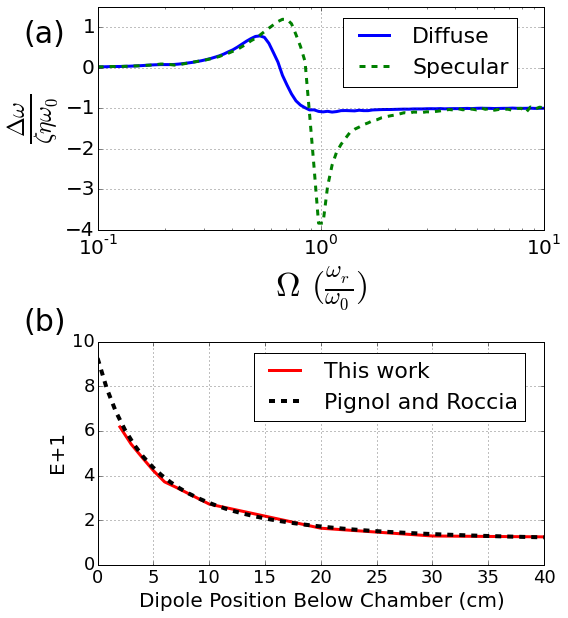

In [60]:
lines = [range(917, 1017),range(1217, 1317)]
legend_tiles = ["Diffuse","Specular"]
color=['blue','red']
linestyles=['-','--']

rcParams['figure.figsize'] = 8, 10
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 18
fig=plt.figure(1)
plt.subplot(211)
fig.subplots_adjust(hspace=.5)

x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "DeltaOmega")
for i in range(len(lines)):
    zeta=1e-8*0.235/(2.*1e-6)
    Omega=[j/Omega_scale_factor for j in x[i]]
    scaled_edm=[j/(zeta*eta*omega_0) for j in y[i]]
    plt.semilogx(Omega,scaled_edm,marker='',label = legend_tiles[i],c=color[i],linestyle=linestyles[i],linewidth=3)

plt.tick_params(labelsize=20)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=34)
plt.ylabel(r'$\frac{\Delta\omega}{\zeta\eta\omega_0}$', fontsize=34)
# plt.title('2D Simulation, Linear Magnetic Gradient', fontsize=22)
plt.grid(True)
plt.axis([ 0.1, 10,-4, 1.5])
plt.legend(bbox_to_anchor=(0.55, .95), loc=2, borderaxespad=0., fontsize=22)
plt.figtext(0, .85, r'(a)', fontsize=30)


rcParams['xtick.labelsize'] = 18
plt.subplot(212)
lines = [range(4822,4828)+range(5460,5464),range(4833,4839)+range(5464,5468),range(4844,4850)+range(5468,5472),range(4855,4861)+range(5472,5476),range(4866,4872)+range(5476,5480)]
data = srkdata.get_plot_data_from_database_mult(lines, ["DipolePositionBelowChamber","FalseEDM","FalseEDMError","PRPrediction","PREPlusOne"])
fixed_data=[]
for line in [data[0]]:
    fixed_line=[]
    for point in zip(*line):
        fixed_line.append([-point[0]*100,-point[4]*point[1]/point[3],point[4]*point[2]/point[3]])
    fixed_line=zip(*fixed_line)
    fixed_data.append(fixed_line)
    plt.plot(fixed_line[0],fixed_line[1],marker='',c='red',linewidth=3,label = "This work")
x=np.linspace(0., 40, num = 50)
y=[]
for dist in x:
    y+=[srkanalysis.calc_e_plus_one(1, 0.24, 0.12, dist/100)]
plt.plot(x,y,linestyle='--', c='black',linewidth=4,label = "Pignol and Roccia")
plt.xlabel(r'Dipole Position Below Chamber (cm)', fontsize=20)
plt.ylabel(r'E+1', fontsize=20)
titles=["","","E+1"]
# srkgraphics.make_plot_from_data(fixed_data, titles)
# plt.xscale('log', noncvposy='clip')
plt.grid(True)
plt.axis([ 0.0, 40,0, 10])
plt.legend(bbox_to_anchor=(0.35, .95), loc=2, borderaxespad=0., fontsize=22)
plt.figtext(0, .45, r'(b)', fontsize=30)
plt.savefig("/home/mjbales/work/nedm/graphs/NonGaussPaper_Validation.pdf", bbox_inches='tight')
plt.show()


3.98107170553
25.1188643151
158.489319246
19.5129180193
4.21549987236
2.25821994347


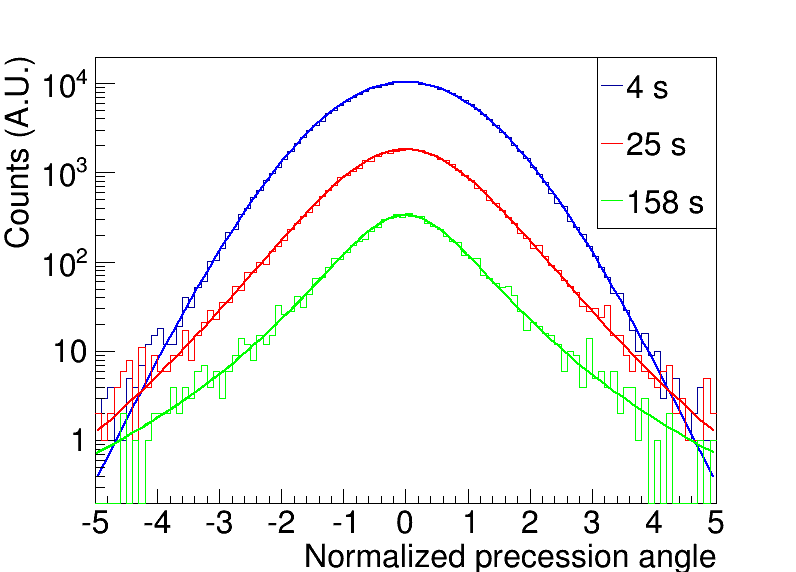

In [14]:
c1.Clear()
c1.SetLeftMargin(0.12)
c1.SetBottomMargin(0.12)
rid=5394
rid2=5395
rid3=5396
par=True
par_str='Par_' if par else 'Anti_'
mean,stdev,time = srkdata.get_data_for_rids_from_database([rid],par_str+"PhiMean,"+par_str+"PhiStDev,TimeLimit")[0]
print time
histogram.IsA().Destructor( histogram )
histogram = TH1D("phi_hist","phi_hist",100,-5,5)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist"
c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)
histogram.SetTitle(";Normalized precession angle;Counts (A.U.)")
histogram.SetStats(False)
histogram.GetYaxis().SetTitleOffset(1.0)
histogram.GetYaxis().SetLabelSize(0.06)
histogram.GetYaxis().SetTitleSize(0.06)
histogram.GetXaxis().SetLabelSize(0.06)
histogram.GetXaxis().SetTitleSize(0.06)

mean,stdev,time = srkdata.get_data_for_rids_from_database([rid2],par_str+"PhiMean,"+par_str+"PhiStDev,TimeLimit")[0]
print time
histogram2.IsA().Destructor( histogram2 )
histogram2 = TH1D("phi_hist2","phi_hist2",100,-5,5)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist2"
c1=srkgraphics.make_root_plot_from_results_file(rid2,par,drawString)
histogram2.SetTitle("Dipole;Normalized Phi;Counts")
histogram2.SetLineColor(ROOT.kRed)
histogram2.SetStats(False)

mean,stdev,time = srkdata.get_data_for_rids_from_database([rid3],par_str+"PhiMean,"+par_str+"PhiStDev,TimeLimit")[0]
print time
histogram3.IsA().Destructor( histogram3 )
histogram3 = TH1D("phi_hist3","phi_hist3",100,-5,5)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist3"
c1=srkgraphics.make_root_plot_from_results_file(rid3,par,drawString)
histogram3.SetTitle("Dipole;Normalized Phi;Counts")
histogram3.SetLineColor(ROOT.kGreen)
histogram3.SetStats(False)

histogram.Draw()
histogram2.Draw("same")
histogram3.Draw("same")

# c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)

phiTsallisFunc = TF1("phiTsallisFunc", "[0]/pow(1+((x)/[1])*((x)/[1]),[2])", -5)
max_bin=histogram.GetBinContent(histogram.GetMaximumBin())
phiTsallisFunc.SetParNames("Amplitude", "Sigma", "Power");
phiTsallisFunc.SetParLimits(1,0.5,8)
phiTsallisFunc.SetParLimits(0,0.5*max_bin,1.5*max_bin)
phiTsallisFunc.SetParLimits(2,0,100)
phiTsallisFunc.SetParameters(max_bin*.5, stdev,2)
phiTsallisFunc.SetLineColor(ROOT.kBlue)
histogram.Fit("phiTsallisFunc","M")
# if ROOT.gMinuit.fCstatu == "CONVERGED ":
#     print "YAY!!!"
# print ROOT.gMinuit.fCstatu
phiTsallisFunc.Draw("same")
print phiTsallisFunc.GetParameter(2)
phiTsallisFunc = TF1("phiTsallisFunc2", "[0]/pow(1+((x)/[1])*((x)/[1]),[2])", -5)
max_bin=histogram2.GetBinContent(histogram2.GetMaximumBin())
phiTsallisFunc.SetParNames("Amplitude", "Sigma", "Power");
phiTsallisFunc.SetParLimits(1,0.5,8)
phiTsallisFunc.SetParLimits(0,0.5*max_bin,1.5*max_bin)
phiTsallisFunc.SetParLimits(2,0,100)
phiTsallisFunc.SetParameters(max_bin*.5, stdev,2)
phiTsallisFunc.SetLineColor(ROOT.kRed)
histogram2.Fit("phiTsallisFunc2","M")
# if ROOT.gMinuit.fCstatu == "CONVERGED ":
#     print "YAY!!!"
# print ROOT.gMinuit.fCstatu
phiTsallisFunc.Draw("same")

print phiTsallisFunc.GetParameter(2)

phiTsallisFunc = TF1("phiTsallisFunc3", "[0]/pow(1+((x)/[1])*((x)/[1]),[2])", -5)
max_bin=histogram3.GetBinContent(histogram3.GetMaximumBin())
phiTsallisFunc.SetParNames("Amplitude", "Sigma", "Power");
phiTsallisFunc.SetParLimits(1,0.5,8)
phiTsallisFunc.SetParLimits(0,0.5*max_bin,1.5*max_bin)
phiTsallisFunc.SetParLimits(2,0,100)
phiTsallisFunc.SetParameters(max_bin*.5, stdev,2)
phiTsallisFunc.SetLineColor(ROOT.kGreen)
histogram3.Fit("phiTsallisFunc3","M")
# if ROOT.gMinuit.fCstatu == "CONVERGED ":
#     print "YAY!!!"
# print ROOT.gMinuit.fCstatu
phiTsallisFunc.Draw("same")
print phiTsallisFunc.GetParameter(2)
# gaus = TF1("gaus","369*TMath::Gaus(x,0,1)",-5,5)
# gaus.SetLineColor(ROOT.kGreen)
# gaus.Draw("same")
c1.SetLogy()
leg = TLegend(0.75,0.6,0.9,0.9);
   
leg.AddEntry("phi_hist","4 s ","l");
leg.AddEntry("phi_hist2","25 s ","l");
leg.AddEntry("phi_hist3","158 s ","l");
leg.SetTextSize(0.06);
leg.Draw("same");

c1.Print(graphs_dir+'NonGaussPaper_TimeDistributions.pdf')
c1


